<a href="https://colab.research.google.com/github/sechiyo97/studyDeeplearning/blob/master/deeplearning_ch4_0528.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


신경망 학습

In [0]:
import sys
import numpy as np
import matplotlib.pylab as plt
sys.path.insert(0,'/content/drive/My Drive/Colab Notebooks/DeepLearning/04')

손실 함수

오차제곱합

In [0]:
def sum_squares_error(y,t):
  return 0.5 * np.sum((y-t)**2)

교차 엔트로피 오차 : 정답일 때의 출력이 전체 값을 정함. 
정답에 해당하는 출력이 커질수록 0에 수렴.


In [0]:
def cross_entropy_error(y,t):
  delta = 1e-7
  return -np.sum(t*np.log(y+delta))

미니배치 학습에서의 손실함수

랜덤 미니배치 뽑아내기

In [19]:
import sys, os
import numpy as np
from mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize= True, one_hot_label = True)

print(x_train.shape) # (60000,784)
print(t_train.shape) # (60000,10)

train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size) # train size에서 batch_size만큼 랜덤으로 선택
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

tran

(60000, 784)
(60000, 10)


배치용 교차 엔트로피 오차

In [0]:
def cross_entropy_error(y,t):
  if y.ndim == 1: # (72,) => (1,72)
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  batch_size = y.shape[0]
  return -np.sum(t * np.log(y+1e-7)) / batch_size

  """ 정답 레이블이 one-hot encoding이 아니라 2,7 등 숫자 레이블일 경우
  def cross_entropy_error(y,t):
  if y.ndim == 1: 
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  batch_size = y.shape[0]
  return -np.sum(t * np.log(y[np.arange(batch_size),t]+1e-7)) / batch_size
  """

손실함수의 사용 이유 : 연속적인 값을 가지기 때문 (정확도는 아님)

수치미분

In [0]:
def numerical_diff(f,x): # 중심 차분 or 중앙 차분
  h = 1e-4 # 0.0001
  return (f(x+h) - f(x-h))/(2*h)

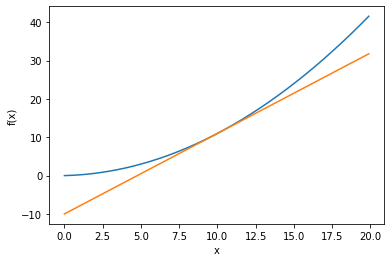

In [44]:
def function_1(x):
  return 0.1*x**2+0.1*x

import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0,20.0,0.1)
y = function_1(x)
y_prime = numerical_diff(function_1,x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)f
#plt.plot(x,y_prime)

# 접선
def linear_func(x0, f, x): # 지나가는 점, 기울기, 입력x
  grad = numerical_diff(f,x0)
  return f(x0) + grad*(x-x0)

l = linear_func(10,function_1, x)
plt.plot(x,l)
plt.show()

편미분

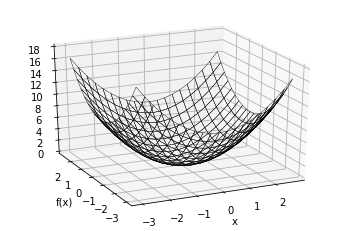

In [261]:
def function_2(x):
  return x[0]**2 + x[1]**2 # x^2+y^2
  # or return sum(x**2)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

x1 = np.arange(-3,3,0.3)
x2 = np.arange(-3,3,0.3)
x, y = np.array(np.meshgrid(x1,x2))
z = function_2((x,y))

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x,y,z, edgecolor='black', linewidth=0.4, shade=False) # facecolors=colors,
surf.set_facecolor((0,0,0,0))
ax.view_init(25,245)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

양 축에 대한 편미분

In [0]:
def numerical_gradient(f,x):
  h = 1e-4 # 0.0001n
  grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성

  for idx in range(len(x)):
    tmp_val = x[idx]

    # f(x+h) 계산
    x[idx] = tmp_val + h
    fxh1 = f(x)
    
    # f(x-h) 계산
    x[idx] = tmp_val - h
    fxh2 = f(x)

    grad[idx] = (fxh1 - fxh2) / (2*h)
    x[idx] = tmp_val # 값 복원

  return grad

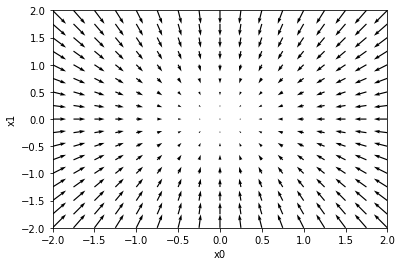

In [340]:
# 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향이 표시됨

x1 = np.arange(-2,2.2,0.25)
x2 = np.arange(-2,2.2,0.25)
x,y = np.meshgrid(x1,x2)

u, v = -numerical_gradient(function_2, np.array([x, y]))
#print(u)

plt.quiver(x,y,u,v)
plt.xlabel("x0")
plt.ylabel("x1")
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.show()

경사법 (경사 하강법)